In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer,accuracy_score, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score,  recall_score

In [2]:
data = pd.read_csv("creditcard.csv",sep=',')

In [3]:
display(data.head())
display(data.shape)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(284807, 31)

        Data analysis

            Searching for missing values

In [4]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

            Correlation Map

<Axes: >

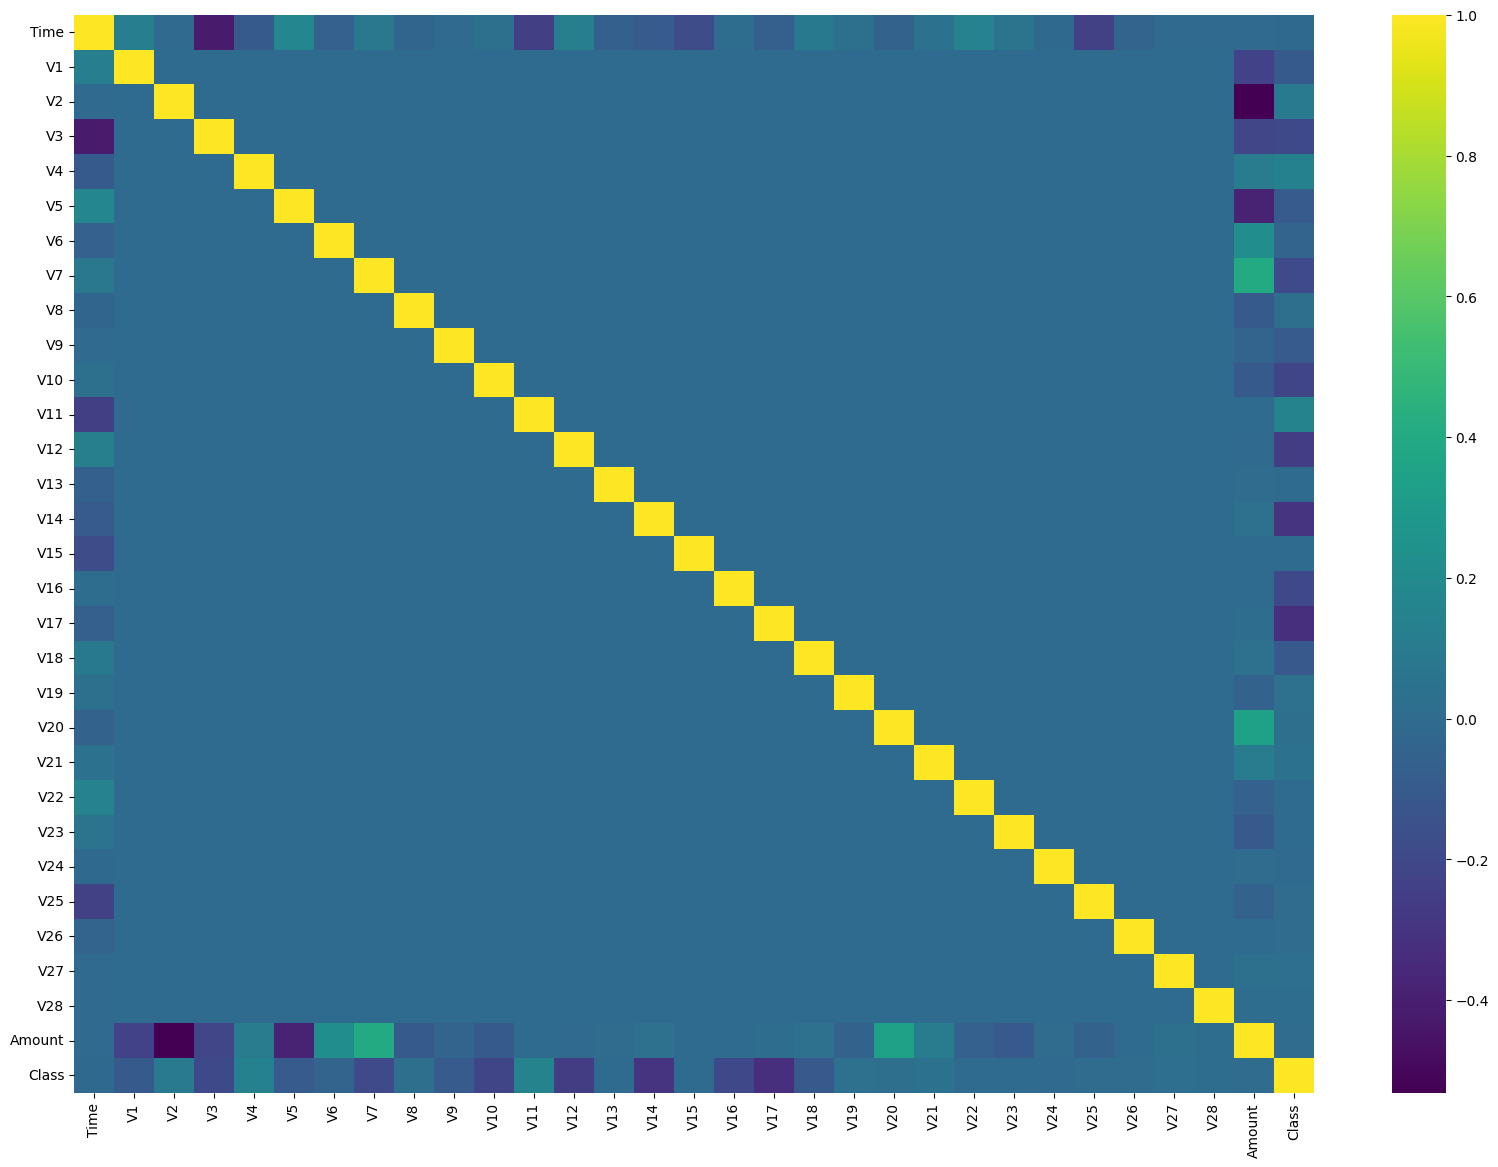

In [5]:
plt.figure(figsize=(20,14))
sns.heatmap(data.corr(), annot=False,cmap="viridis")


            Values Distribution

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

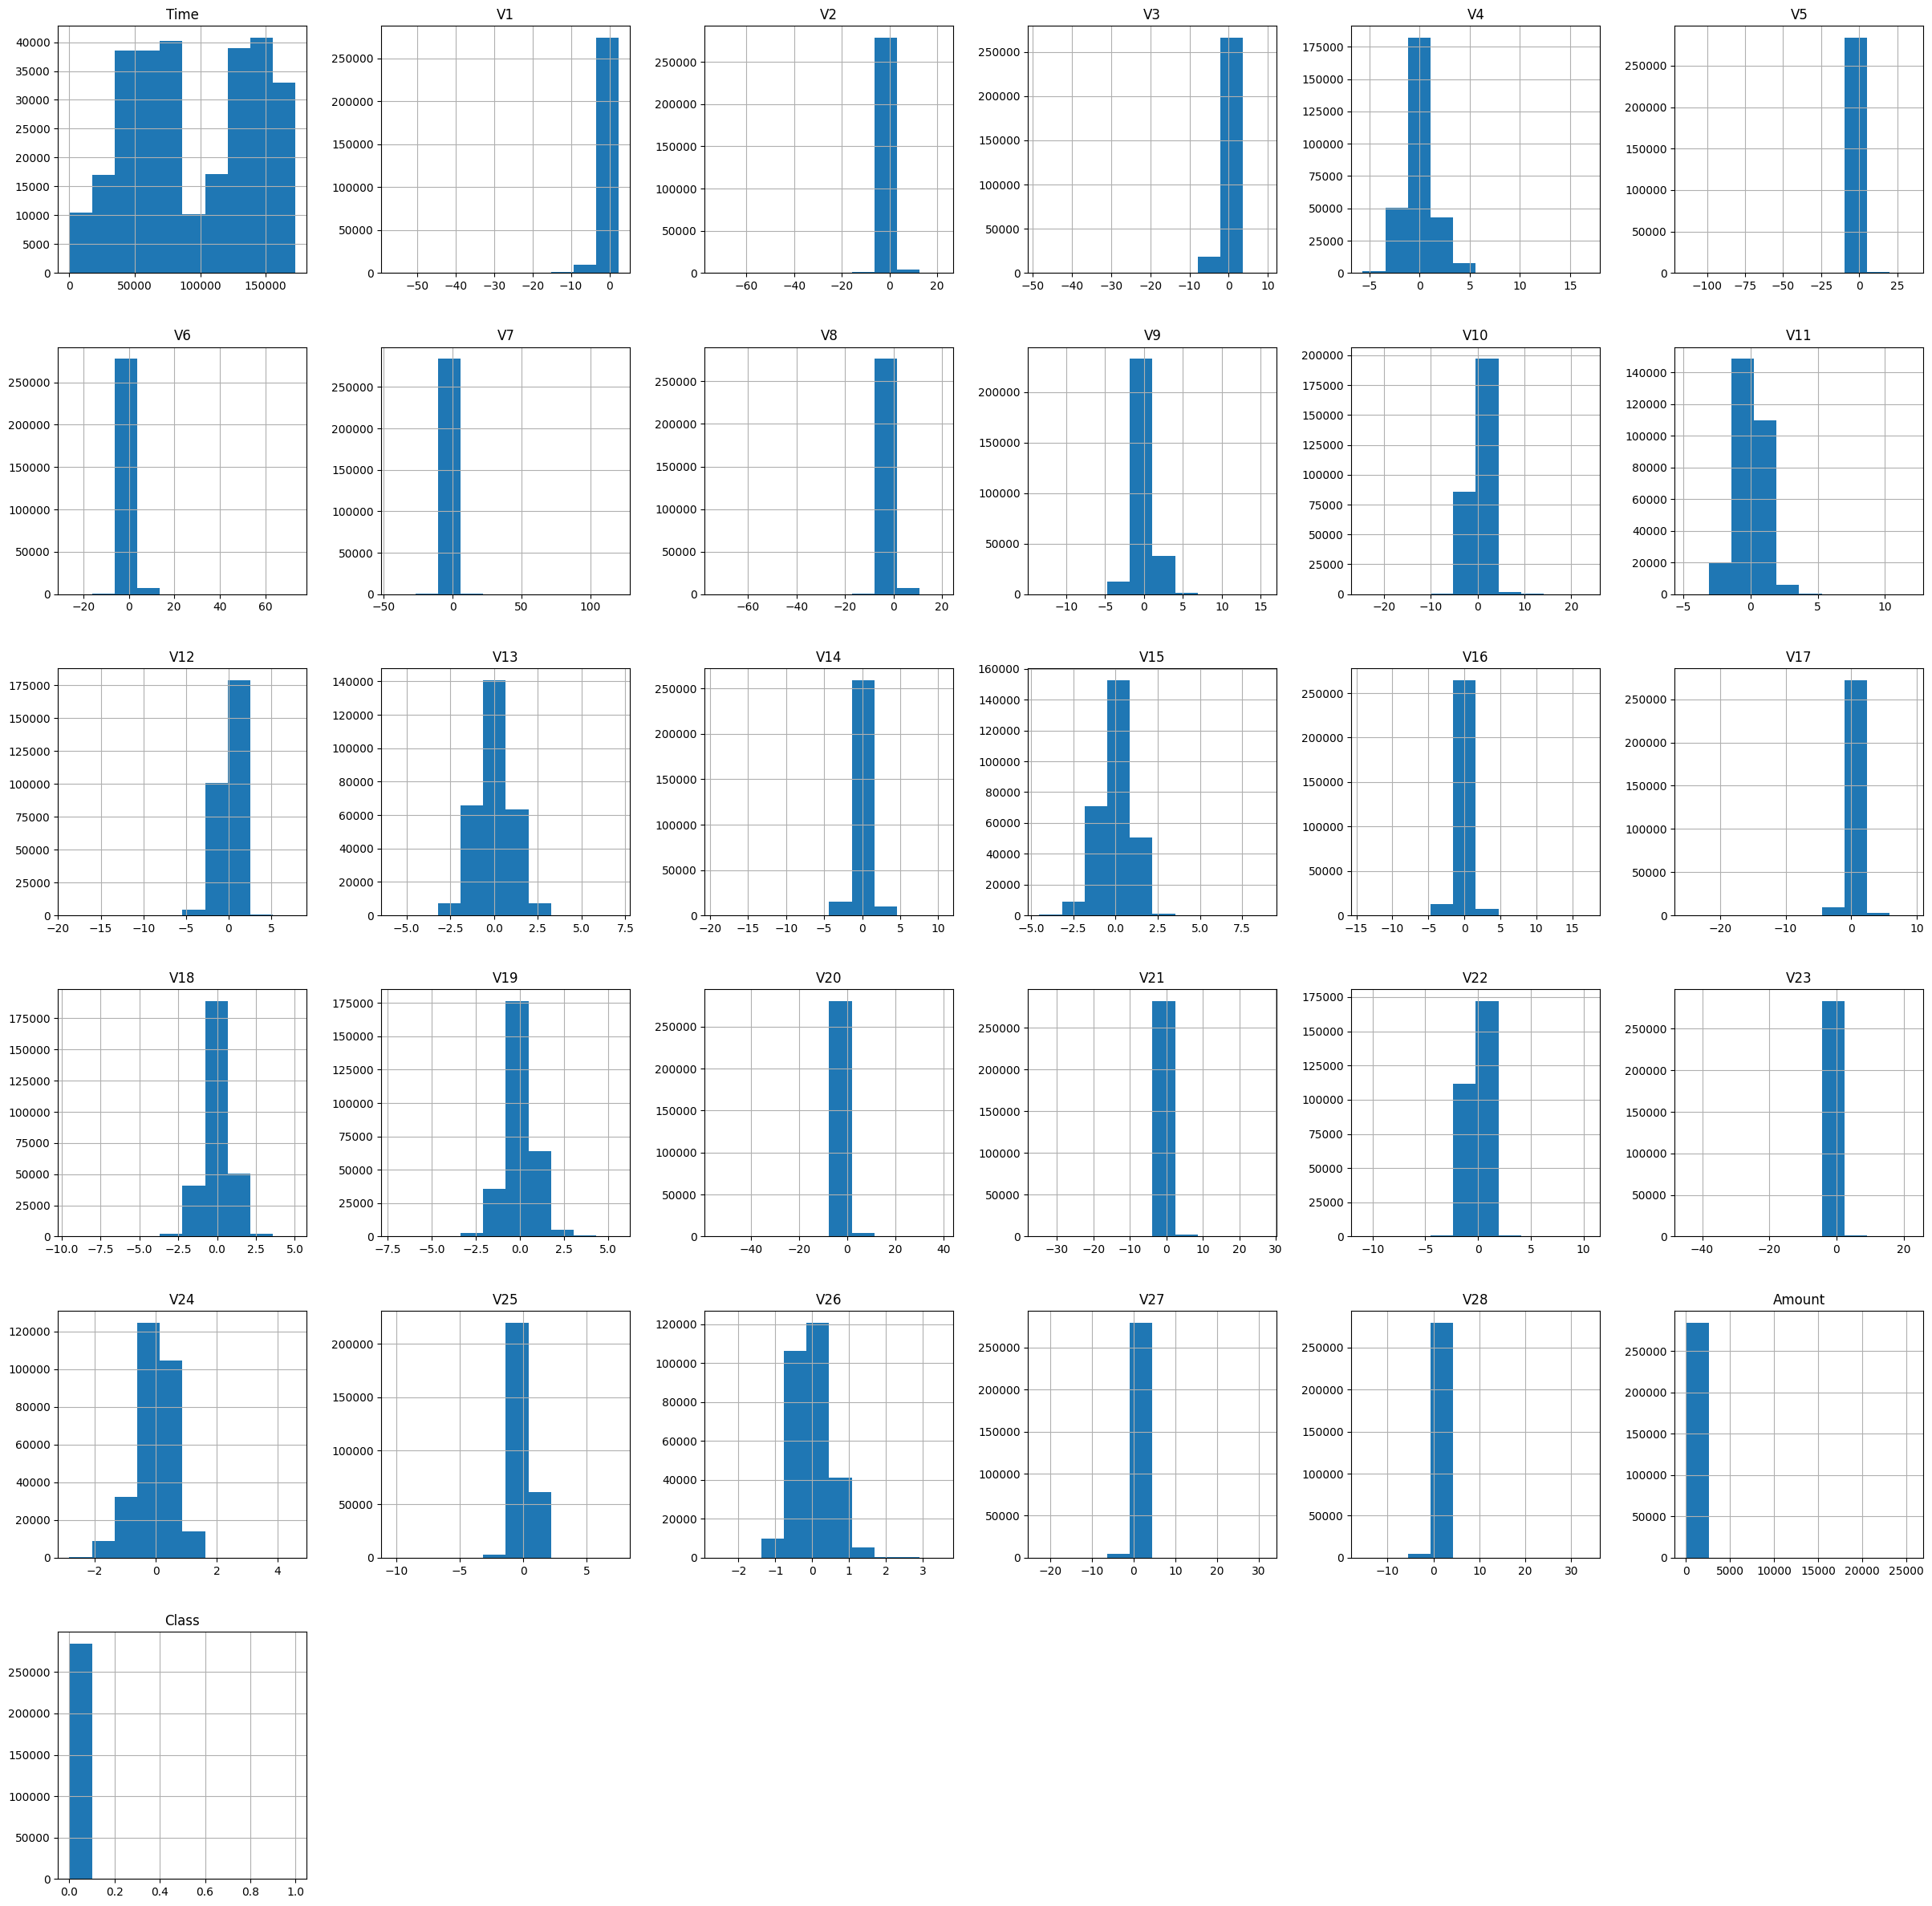

In [6]:
data.hist(figsize=(30,30))

            Analyse impact of time on fraud

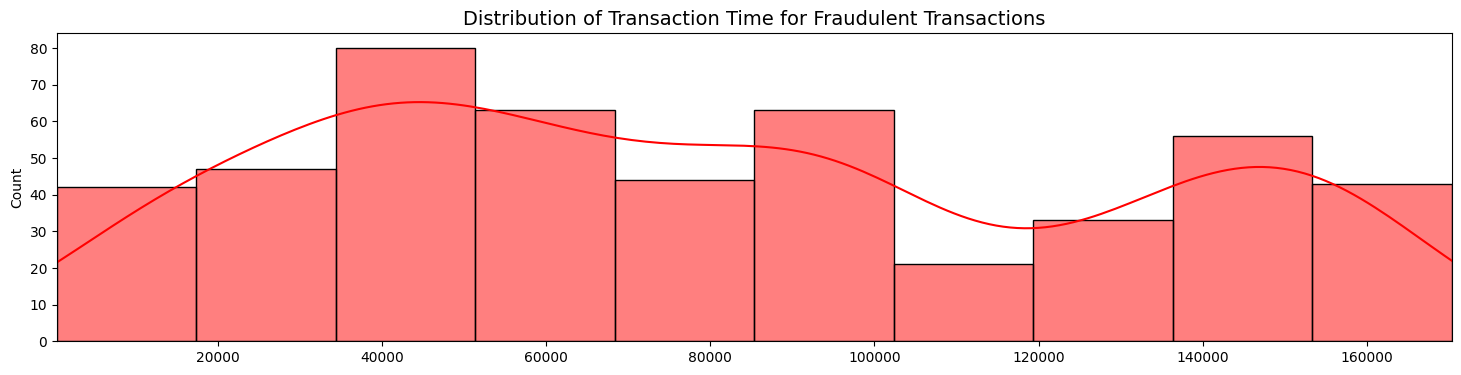

In [30]:

fig, ax = plt.subplots(1, figsize=(18, 4))

#Filter the data to include only fraudulent transactions
fraud_data = data[data['Class'] == 1]
time_val_fraud = fraud_data['Time'].values

#Distribution of Transaction Time for Fraudulent Transactions
sns.histplot(time_val_fraud, color='red', kde=True)
ax.set_title('Distribution of Transaction Time for Fraudulent Transactions', fontsize=14)
ax.set_xlim([min(time_val_fraud), max(time_val_fraud)])

plt.show()


    Preparation of our DataSet

            Splitting the DataSet to got our Train and Test

In [7]:
X=data.drop("Class",axis=1)
Y=data["Class"]


In [8]:
#Small Verification 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)
print("Ratio Train Set :  ",sum(Y_train.values)/len(Y_train))
print("Ratio Train Set :  ",sum(Y_test.values)/len(Y_test))

Ratio Train Set :   0.001729245759178389
Ratio Train Set :   0.0017204452090867595


    Machine Learning

            Finding The Best Model

In [9]:
#Our differents Models
classifiers = {
    'RandomForest': RandomForestClassifier(),
    #'GradientBoosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'DecisionTree' : DecisionTreeClassifier(),
    'XGBoost' : XGBClassifier()
}

#Parameters for our differents Models
param_grid = {
    'RandomForest': {'n_estimators': [10, 50], 'max_depth': [None, 8]},
    #'GradientBoosting': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2]},
    'DecisionTree' : {'max_depth': [None, 8]},
    'XGBoost' : {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2]}
}   

            Loop using GridSearchCV to find the optimal Model with our given parameters

In [10]:
best_score=0

average_precision_scorer = make_scorer(average_precision_score, greater_is_better=True)


for model_name, model in classifiers.items():
    grid_search = GridSearchCV(model, param_grid[model_name],scoring=average_precision_scorer, cv=5)
    grid_search.fit(X_train, Y_train)
    best_clf = grid_search.best_estimator_

    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_model_name=model_name

    predictions = best_clf.predict(X_test)

    score = average_precision_score(Y_test, predictions)
    print(f"{model_name} - Best Score: {grid_search.best_score_}, Test Score: {score}, Best Parameters: {grid_search.best_params_}")

KNN - Best Score: 0.07400595000772614, Test Score: 0.09339917983274207, Best Parameters: {'n_neighbors': 3}
DecisionTree - Best Score: 0.6642348136153242, Test Score: 0.7158804486182717, Best Parameters: {'max_depth': 8}
XGBoost - Best Score: 0.7449035906554512, Test Score: 0.756011549447775, Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}


    Analysis of our Best Model

            Predictions

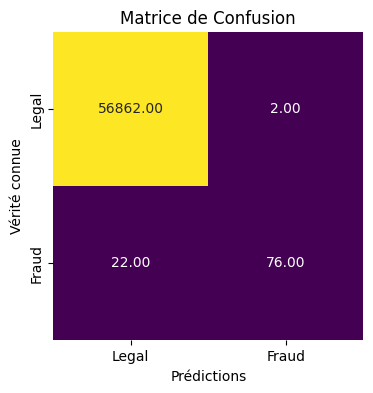

In [11]:
Y_pred=best_model.predict(X_test)

# Display confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt=".2f", cmap="viridis", cbar=False,
            xticklabels=["Legal", "Fraud"],
            yticklabels=["Legal", "Fraud"])
plt.xlabel('Prédictions')
plt.ylabel('Vérité connue')
plt.title('Matrice de Confusion')
plt.show()

            Given the class imbalance ratio, we  measure the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [31]:
print("Model : ",best_model_name)

print(f'Balanced  :{balanced_accuracy_score(Y_test, Y_pred):.2f}' )
print(f'F1        :{f1_score(Y_test, Y_pred):.2f}' )
print(f'Precision :{precision_score(Y_test, Y_pred):.2f}' )
print(f'Recall    :{recall_score(Y_test, Y_pred):.2f}' )
print(f'AUPRC    :{average_precision_score(Y_test, Y_pred):.2f}' )

Model :  XGBoost
Balanced  :0.89
F1        :0.86
Precision :0.97
Recall    :0.78
AUPRC    :0.76
